# Movie Data Analysis for Microsoft Recommendations

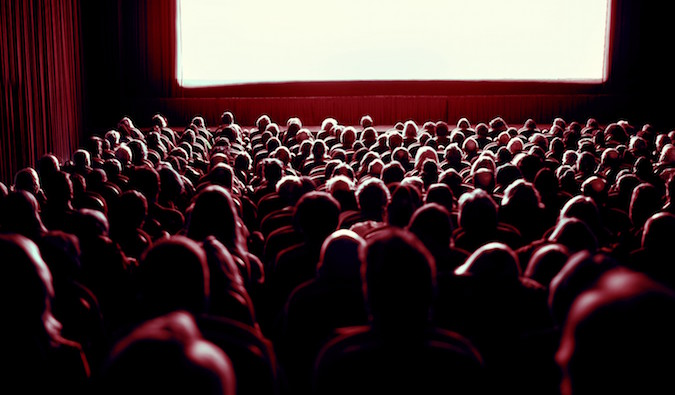

## Overview

This project explores different types of films in order to identify actionable recommendataions for Microsoft's new movie studio. Descriptive analysis of which films perform the best at the box office shows that film ratings can vary depending on the genre and runtime and some genres tend to have higher grossing films than others. Microsoft can use this analysis to aid their decision in prioritizing which types of films to create.

## Business Problem

Like other companies creating original video content, Microsoft may be able to utilize current success metrics to appropriately allocate their resources and produce films that will perform well. By doing so, Microsoft can become a household name studio that has films enjoyed by many. By using datasets from some of the most popular film review websites, such as IMDB, I describe the relationship between genres, ratings, and gross to anticipate what films will be successful.

## Data Understanding

IMDB and The Numbers are popular film review sites that have a plethora of datasets on not only ratings, but gross and other information related to the film. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
imdb_basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
imdb_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### IMDB Genres and Ratings Data

The IMDB titles dataset includes the film titles from 2010 and projected titles up until 2115, with additional information in runtime and genres. The ratings dataset includes average rating and number of votes for each film.

In [5]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [6]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


### The Numbers Data

The Numbers dataset includes release date, production budget, domestic and worldwide gross.

In [17]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


## Data Preparation

### Data Cleaning

For genres and ratings, I start by checking for any null values in both datasets and finding the unique genres. I then need to break out the genres listed in the genre column by creating a list of all the unique genres and populating this list into the dataframe.

In [19]:
imdb_basics['genres'].isna().sum()

5408

In [20]:
#replacing null values in genres with string, code from Lindsey
imdb_basics['genres'] = imdb_basics['genres'].fillna('Unknown')

In [21]:
#creating a unique genres list to break out genres from the column in df
unique_genres_list = []
for genre_details in imdb_basics['genres']:
    genres_list = genre_details.split(',')
    for genre in genres_list:
        unique_genres_list.append(genre)
        
unique_genres_list = sorted(list(set(unique_genres_list)))
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [22]:
#adding the list of unique genres to the dataframe
for genre in unique_genres_list:
    imdb_basics[genre] = 0

In [23]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#now populating each unique genre column when it appears in the genres column
for index, genre_details in enumerate(imdb_basics['genres']):
    for genre in unique_genres_list:
        if genre in genre_details:
            imdb_basics.at[index, genre] = 1

In [25]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#checking null values in ratings
imdb_ratings['averagerating'].isna().sum()

0

For the budgets dataset, I change the datatype of some columns to make them easier to work with later on.

In [26]:
#https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
budgets['production_budget'] = budgets['production_budget'].replace('[\$\,\.]',"",regex=True).astype(int)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$\,\.]',"",regex=True).astype(int)

In [27]:
#changing release_date to datetime object
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [28]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


### Merging Datasets

For the IMDB datasets, there is a primary key 'tconst'. This will allow for a simple merge.

In [30]:
imdb_df = pd.merge(imdb_basics, imdb_ratings, on="tconst")

In [31]:
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,6.9,4517


## Analysis

### Average Rating Per Genre

News, Documentaries, and Biography genres have higher rated movies. Although, one thing to keep in mind is that these genres don't have as many movies such as Comedy, Drama, and Thriller.

In [33]:
#what's the average rating per genre? helpful code from Lindsey! 
#but number of votes probably dictates the average rating for a movie, this may skew are mean per genre
for genre in unique_genres_list:
    genre_ratings = imdb_df.loc[imdb_df[genre] == 1]['averagerating'].mean()
    print(f"{genre}: {genre_ratings: .1f} average rating")

Action:  5.8 average rating
Adult:  3.8 average rating
Adventure:  6.2 average rating
Animation:  6.2 average rating
Biography:  7.2 average rating
Comedy:  6.0 average rating
Crime:  6.1 average rating
Documentary:  7.3 average rating
Drama:  6.4 average rating
Family:  6.4 average rating
Fantasy:  5.9 average rating
Game-Show:  7.3 average rating
History:  7.0 average rating
Horror:  5.0 average rating
Music:  6.9 average rating
Musical:  6.5 average rating
Mystery:  5.9 average rating
News:  7.3 average rating
Reality-TV:  6.5 average rating
Romance:  6.1 average rating
Sci-Fi:  5.5 average rating
Short:  8.8 average rating
Sport:  7.0 average rating
Talk-Show:  nan average rating
Thriller:  5.6 average rating
Unknown:  6.5 average rating
War:  6.6 average rating
Western:  5.9 average rating


In [32]:
#how many movies are in each genre
genre_total = {}
for genre in unique_genres_list:
    genre_total[genre] = imdb_df[genre].sum()

In [34]:
genre_total

{'Action': 6988,
 'Adult': 3,
 'Adventure': 3817,
 'Animation': 1743,
 'Biography': 3809,
 'Comedy': 17290,
 'Crime': 4611,
 'Documentary': 17753,
 'Drama': 30788,
 'Family': 3412,
 'Fantasy': 2126,
 'Game-Show': 2,
 'History': 2825,
 'Horror': 7674,
 'Music': 2644,
 'Musical': 721,
 'Mystery': 3039,
 'News': 579,
 'Reality-TV': 17,
 'Romance': 6589,
 'Sci-Fi': 2206,
 'Short': 1,
 'Sport': 1179,
 'Talk-Show': 0,
 'Thriller': 8217,
 'Unknown': 804,
 'War': 853,
 'Western': 280}

In [35]:
#as you can see genres like adult and short have only a few movies or less in each...
#no wonder our means were either very high or low compared to other genres
#will only take movies with at least 50 number of votes, and then will drop genres with too few movies!
imdb_voted = imdb_df[imdb_df['numvotes'] >= 50]

In [36]:
#creating a new dictionary
imdb_details = {}

for genre in unique_genres_list:
    genre_df = imdb_voted.loc[imdb_voted[genre] == 1]
    total_movies = imdb_voted[genre].sum()
    avg_rating = genre_df['averagerating'].mean()
    imdb_details[genre] = {'total_movies': total_movies, 'avg_rating': avg_rating}
    
imdb_details

{'Action': {'total_movies': 4586, 'avg_rating': 5.581639773222853},
 'Adult': {'total_movies': 1, 'avg_rating': 2.0},
 'Adventure': {'total_movies': 2329, 'avg_rating': 5.836753971661657},
 'Animation': {'total_movies': 1063, 'avg_rating': 6.309595484477893},
 'Biography': {'total_movies': 1782, 'avg_rating': 6.933221099887766},
 'Comedy': {'total_movies': 10495, 'avg_rating': 5.746450690805145},
 'Crime': {'total_movies': 3077, 'avg_rating': 5.928501787455313},
 'Documentary': {'total_movies': 5256, 'avg_rating': 7.152035768645358},
 'Drama': {'total_movies': 17233, 'avg_rating': 6.201067718911391},
 'Family': {'total_movies': 1743, 'avg_rating': 6.04968445209409},
 'Fantasy': {'total_movies': 1259, 'avg_rating': 5.632883240667196},
 'Game-Show': {'total_movies': 1, 'avg_rating': 5.6},
 'History': {'total_movies': 1269, 'avg_rating': 6.744208037825059},
 'Horror': {'total_movies': 4440, 'avg_rating': 4.728783783783784},
 'Music': {'total_movies': 1219, 'avg_rating': 6.670385561936014}

In [37]:
pop_genres_df = pd.DataFrame(imdb_details).T

In [38]:
pop_genres_df

,total_movies,avg_rating
Action,4586.0,5.581640
Adult,1.0,2.000000
Adventure,2329.0,5.836754
Animation,1063.0,6.309595
Biography,1782.0,6.933221
Comedy,10495.0,5.746451
Crime,3077.0,5.928502
Documentary,5256.0,7.152036
Drama,17233.0,6.201068
Family,1743.0,6.049684


In [39]:
#helpful code from Lindsey
drop_genre = [genre for genre in pop_genres_df.index if pop_genres_df['total_movies'][genre] <= 5]

In [40]:
drop_genre

['Adult', 'Game-Show', 'Reality-TV', 'Short', 'Talk-Show']

In [41]:
pop_genres_df = pop_genres_df.drop(index = drop_genre)

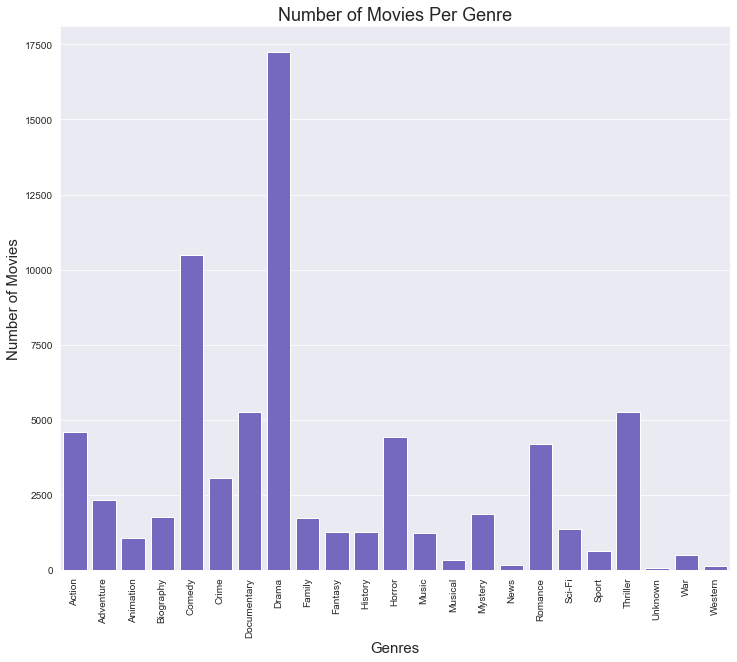

In [68]:
#https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')

plot = sns.barplot(x=pop_genres_df.index, y='total_movies', data=pop_genres_df, color='slateblue')

plt.setp(plot.get_xticklabels(), rotation=90)

plt.xlabel('Genres', size=15)
plt.ylabel('Number of Movies', size=15)
plt.title('Number of Movies Per Genre', size=18)
plt.show()

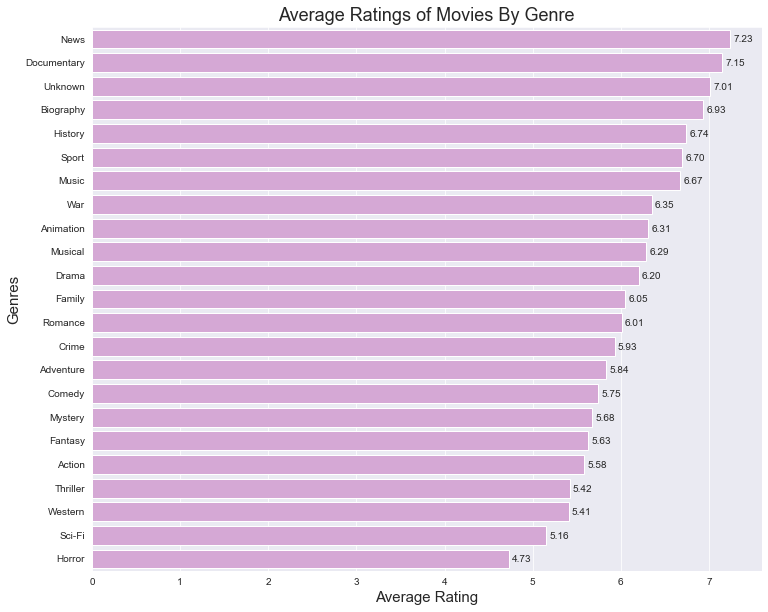

In [65]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')

#code from https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017
plot = sns.barplot(x='avg_rating', y=pop_genres_df.index, data=pop_genres_df,
                   order=pop_genres_df.sort_values('avg_rating', ascending=False).index, color='plum')

for p in plot.patches:
    width = p.get_width()
    plt.text(0.15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel('Average Rating', size=15)
plt.ylabel('Genres', size=15)
plt.title('Average Ratings of Movies By Genre', size=18)
plt.show()

### Runtime and Ratings

In [45]:
#used same dataset that was filtered for movies with at least 50 votes
imdb_voted['runtime_minutes'].describe()

count    35367.000000
mean        99.777193
std         79.660014
min          8.000000
25%         87.000000
50%         95.000000
75%        108.000000
max      14400.000000
Name: runtime_minutes, dtype: float64

In [46]:
imdb_run = imdb_voted.copy(deep=True)

In [47]:
imdb_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36824 entries, 0 to 73852
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           36824 non-null  object 
 1   primary_title    36824 non-null  object 
 2   original_title   36824 non-null  object 
 3   start_year       36824 non-null  int64  
 4   runtime_minutes  35367 non-null  float64
 5   genres           36824 non-null  object 
 6   Action           36824 non-null  int64  
 7   Adult            36824 non-null  int64  
 8   Adventure        36824 non-null  int64  
 9   Animation        36824 non-null  int64  
 10  Biography        36824 non-null  int64  
 11  Comedy           36824 non-null  int64  
 12  Crime            36824 non-null  int64  
 13  Documentary      36824 non-null  int64  
 14  Drama            36824 non-null  int64  
 15  Family           36824 non-null  int64  
 16  Fantasy          36824 non-null  int64  
 17  Game-Show   

In [48]:
#any movies without runtime info?
imdb_run['runtime_minutes'].isna().sum()

1457

In [49]:
#since this is less than 4% of our data, let's drop these rows
imdb_run = imdb_run.dropna(subset=['runtime_minutes'])
imdb_run['runtime_minutes'].isna().sum()

0

In [50]:
#since there over 35,000 movies, let's split our runtime into categories
#using np.where to create new columns based on condition (a tip from Lindsey)
imdb_run['short'] = np.where(imdb_run['runtime_minutes'] < 60, 1, 0)
imdb_run['medium'] = np.where((imdb_run['runtime_minutes'] >= 60) & (imdb_run['runtime_minutes'] <= 120), 1, 0)
imdb_run['long'] = np.where(imdb_run['runtime_minutes'] > 120, 1, 0)

In [51]:
imdb_run.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Talk-Show,Thriller,Unknown,War,Western,averagerating,numvotes,short,medium,long
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,7.0,77,0,0,1
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,6.9,4517,0,0,1
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,0,0,0,6.5,119,0,1,0


In [49]:
#test = imdb_run[['primary_title', 'runtime_minutes', 'averagerating']]
#test_dict = test.set_index('primary_title').T.to_dict('dict')
#data = list(test_dict.items())
#array_test = np.array(data)

In [52]:
#find the average rating of all movies categorized in short, medium, and long runtimes
length_cat = ['short', 'medium', 'long']

In [53]:
for cat in length_cat:
    ratings = imdb_run.loc[imdb_run[cat] == 1]['averagerating'].mean()
    print(f"{cat}: {ratings: .2f} average rating")

short:  6.81 average rating
medium:  5.90 average rating
long:  6.47 average rating


In [54]:
movie_details = {}

for cat in length_cat:
    cat_df = imdb_run.loc[imdb_run[cat] == 1]
    total_movies = imdb_run[cat].sum()
    average_rating = cat_df['averagerating'].mean()
    movie_details[cat] = {'Number of Movies': total_movies,
                          'Average Rating': average_rating}
    
movie_details                                 

{'short': {'Number of Movies': 525, 'Average Rating': 6.805523809523809},
 'medium': {'Number of Movies': 30256, 'Average Rating': 5.902095452141724},
 'long': {'Number of Movies': 4586, 'Average Rating': 6.472546881814217}}

In [53]:
#https://stackoverflow.com/questions/18012505/python-pandas-dataframe-columns-convert-to-dict-key-and-value
# movies_dict = dict(zip(imdb_run.primary_title, imdb_run.averagerating))

In [55]:
runtime_df = pd.DataFrame(movie_details).T

In [56]:
runtime_df

,Number of Movies,Average Rating
short,525.0,6.805524
medium,30256.0,5.902095
long,4586.0,6.472547


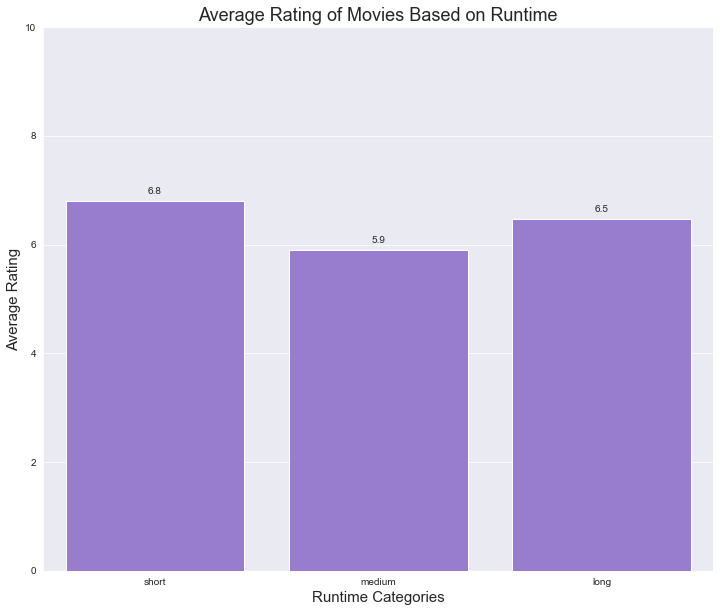

In [69]:
#scatter plot to see correlation between runtime and average rating
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')

plot = sns.barplot(x=runtime_df.index, y='Average Rating', data=runtime_df, color='mediumpurple')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plot.set(ylim=(0,10))
plt.xlabel('Runtime Categories', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('Average Rating of Movies Based on Runtime', size=18)
plt.show()

### Highest Grossing Films

In [59]:
#there are some old movies...will only look at the last 10 years
recent_df = budgets.loc[(budgets['release_date'] >= '2010-01-01')
                       & (budgets['release_date'] < '2020-01-01')]

In [60]:
recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2191 non-null   int64         
 1   release_date       2191 non-null   datetime64[ns]
 2   movie              2191 non-null   object        
 3   production_budget  2191 non-null   int64         
 4   domestic_gross     2191 non-null   int64         
 5   worldwide_gross    2191 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 119.8+ KB


In [71]:
#grabbing the original imdb movie titles dataframe
movie_df = imdb_basics.copy(deep=True)

In [72]:
movie_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#also filtering out movies that are older than 10 years
movie_rec = movie_df.loc[(movie_df['start_year'] >=2010)
                        & (movie_df['start_year'] <2020)]

In [74]:
test = recent_df.sort_values(by=['worldwide_gross'], ascending=False)
test.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799


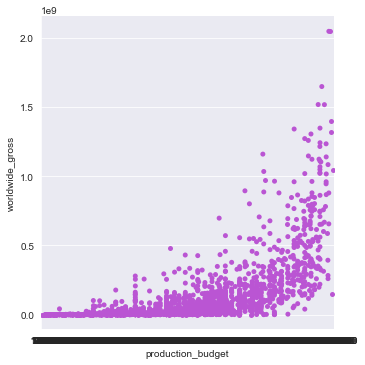

In [75]:
sns.catplot(x='production_budget', y='worldwide_gross', data=test, color='mediumorchid')

In [78]:
#now to combine recent_df & movie_rec...since there is no primary key, will join on the movie titles
#duplicated = list(recent_df.loc[recent_df['release_date'].duplicated()]['release_date'])

In [72]:
#duplicated_two = list(movie_rec.loc[movie_rec['primary_title'].duplicated()]['primary_title'])

## Conclusions

This analysis leads to three recommendations for Microsoft to consider as they develop films under their new movie studio:
- In terms of average rating, movies in News, Documentaries and Biography have higher ratings compared to others. While these genres may not have as many films as other genres, it's important to note rating as a success metric that viewers might use to determine whether or not to view the movie. 
- Shorter movies have higher ratings compared to longer movies. Given the range of runtimes, movies that are too long might not be received as well by viewers.

### Next Steps

Further analyses could lead to additional and more specific insights to produce movies that will perform best: